# Machine Learning Project

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:

  1. BI-RADS assessment: 1 to 5 (ordinal)
  2. Age: patient's age in years (integer)
  3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
  4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
  5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
  6. Severity: benign=0 or malignant=1 (binominal)

BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

# Your assignment

Apply several different supervised machine learning techniques to this data set, and see which one yields the highest accuracy as measured with K-Fold cross validation (K=10). Apply:

  1. Linear Regression
  2. Logistic Regression
  3. Decision Tree classification
  4. Naive Bayes
  5. Random Forest
  6. SVM
  7. KNN

And, as a bonus challenge, a neural network using Keras.
The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember some techniques such as SVM also require the input data to be normalized first.

Many techniques also have "hyperparameters" that need to be tuned. Once you identify a promising approach, see if you can make it even better by tuning its hyperparameters

In [219]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import  StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , roc_auc_score , roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [2]:
     ## Reading the dataset ##

df = pd.read_csv(r'C:\Users\DELL\Downloads\archive (36)\Cleaned_data.csv')

In [3]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


# Inspecting the Dataframe

In [4]:
      ## Check the number of rows and columns in the dataframe ##
    
df.shape

(830, 6)

Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe

In [5]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   BI-RADS   830 non-null    int64
 1   Age       830 non-null    int64
 2   Shape     830 non-null    int64
 3   Margin    830 non-null    int64
 4   Density   830 non-null    int64
 5   Severity  830 non-null    int64
dtypes: int64(6)
memory usage: 39.0 KB


In [7]:
df.columns

Index(['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')

In [8]:
df.duplicated().sum()

266

In [9]:
df.dtypes

BI-RADS     int64
Age         int64
Shape       int64
Margin      int64
Density     int64
Severity    int64
dtype: object

In [10]:
df.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [11]:
df['Severity'].value_counts()

0    427
1    403
Name: Severity, dtype: int64

In [12]:
print(df['Margin'].unique())
print(df['Shape'].unique())

[5 1 4 3 2]
[3 4 1 2]


# Data Visualization

<AxesSubplot:xlabel='Severity', ylabel='count'>

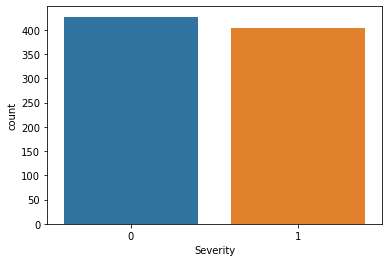

In [13]:
sns.countplot(x='Severity', data = df)

<AxesSubplot:xlabel='Margin', ylabel='count'>

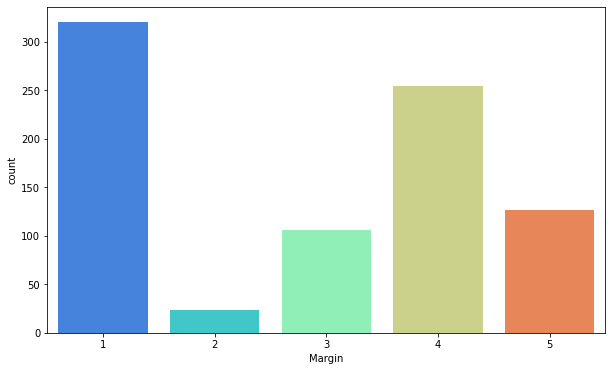

In [14]:
# Margin.value_counts()

plt.figure(figsize=(10,6))
sns.countplot(x='Margin', data=df,palette='rainbow')

<AxesSubplot:xlabel='Shape', ylabel='count'>

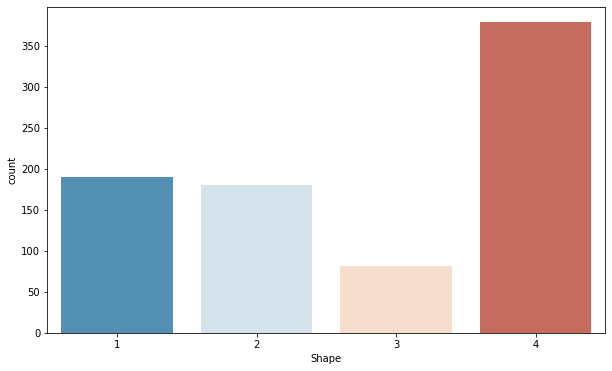

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Shape', data=df,palette='RdBu_r')

Text(0, 0.5, 'Density')

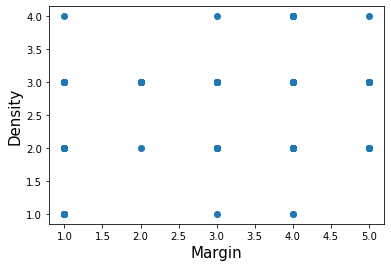

In [16]:
x = df['Margin']
y = df['Density']
plt.scatter(x, y)
plt.xlabel('Margin', fontsize = 15)
plt.ylabel('Density', fontsize = 15)

(array([320.,   0.,  23.,   0.,   0., 106.,   0., 254.,   0., 127.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

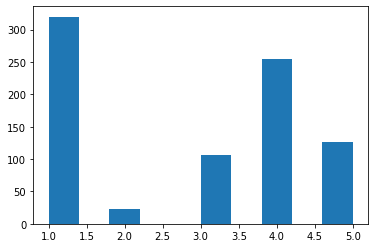

In [17]:
plt.hist(df['Margin'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

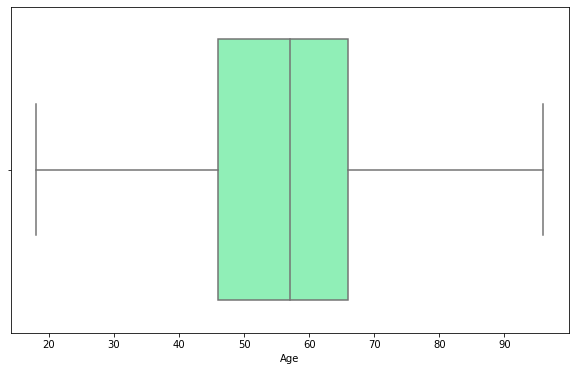

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(df['Age'],palette='rainbow')

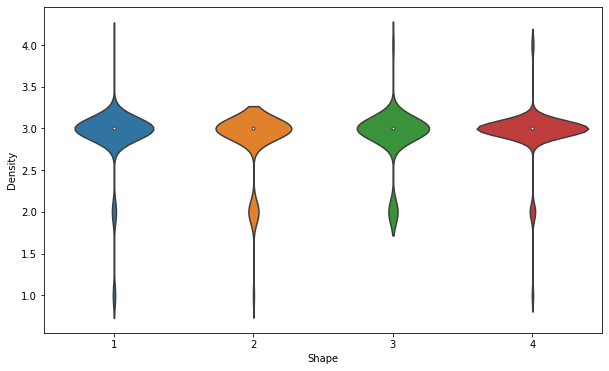

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(y = 'Density', x = 'Shape', data = df)
plt.show()

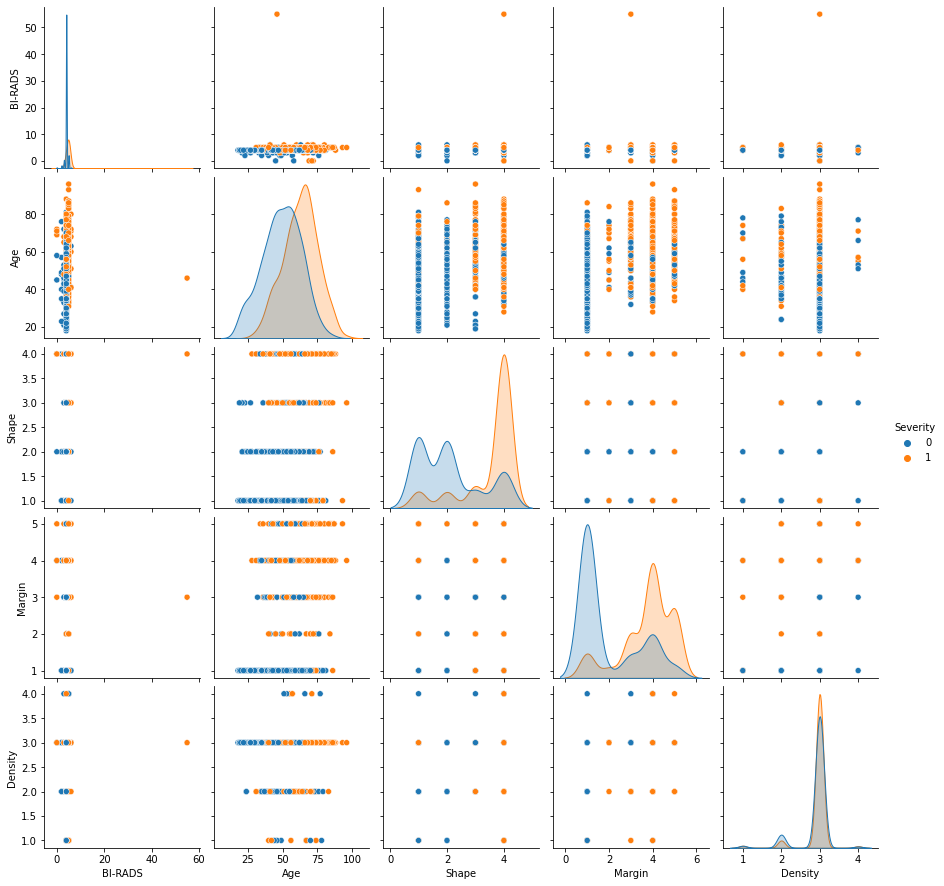

In [20]:
sns.pairplot(df, hue = 'Severity')

<Figure size 864x576 with 0 Axes>

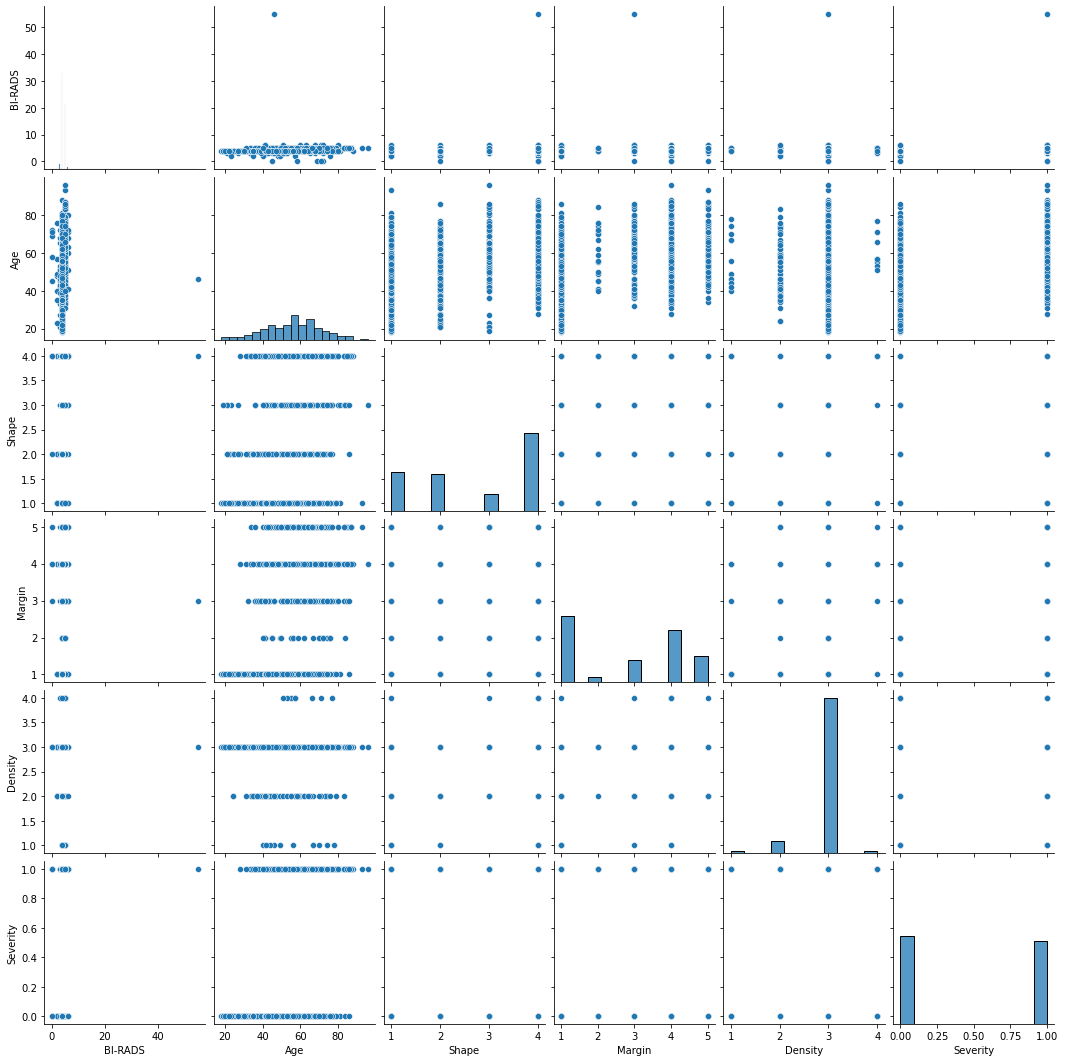

In [21]:
plt.figure(figsize=(12,8))
sns.pairplot(df)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Margin', ylabel='Density'>

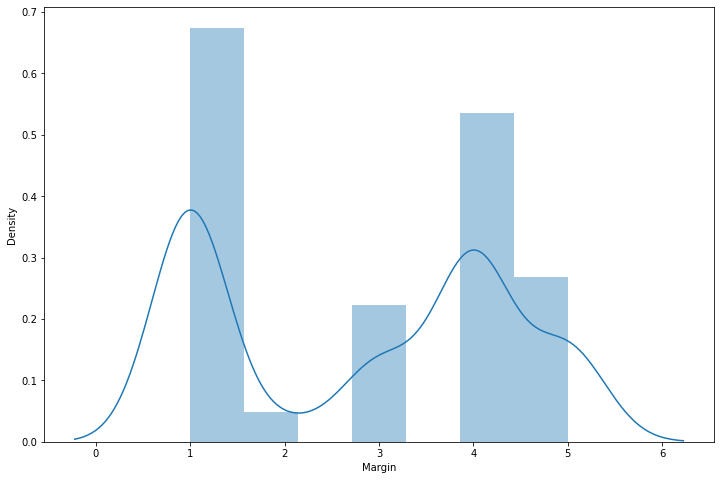

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(df['Margin'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

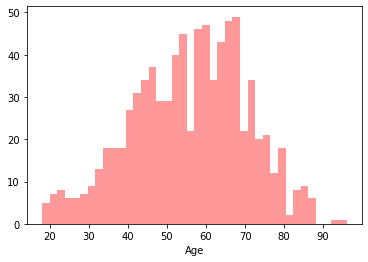

In [23]:
         ## kde for kernel density estimation

sns.distplot(df['Age'].dropna(),kde=False,bins=40,color='red')

<AxesSubplot:>

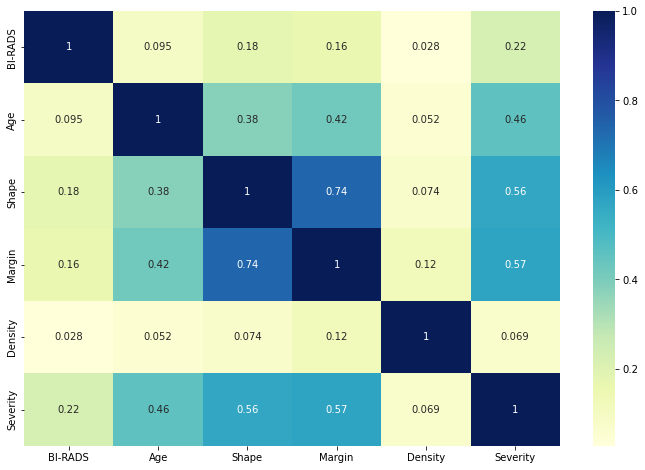

In [24]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,cmap='YlGnBu')

<AxesSubplot:xlabel='Shape', ylabel='Age'>

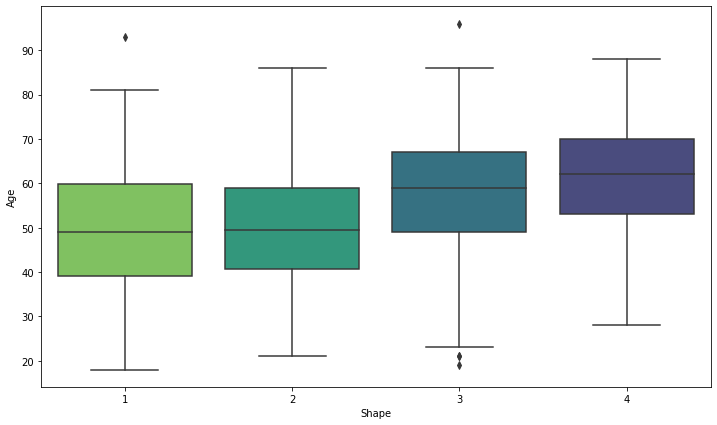

In [25]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Shape',y = 'Age', data = df, palette='viridis_r')

<AxesSubplot:xlabel='Age', ylabel='Shape'>

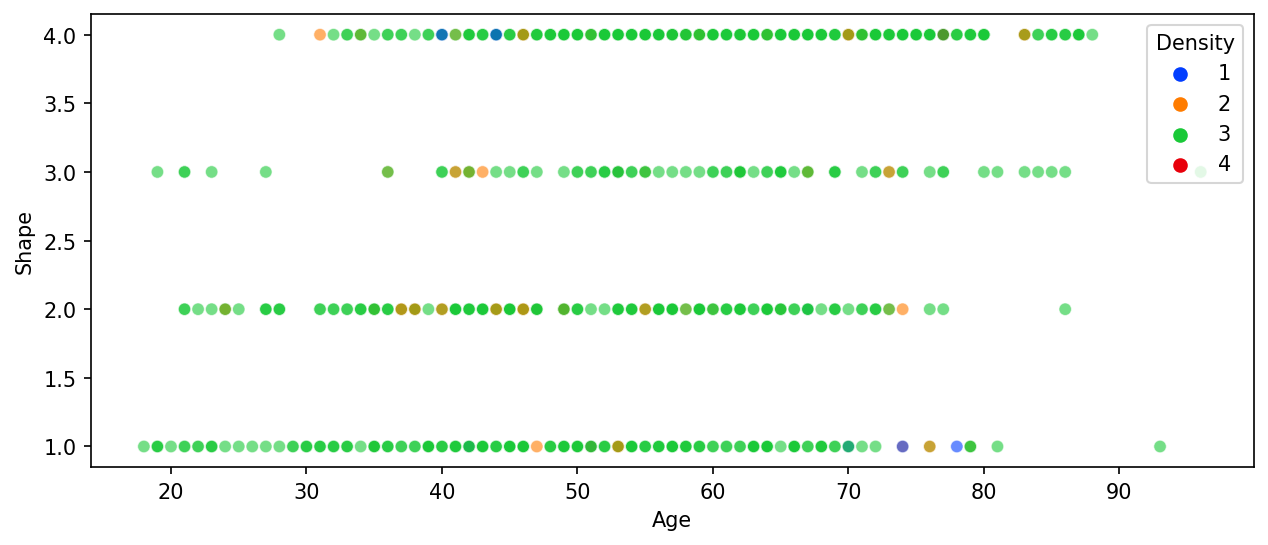

In [26]:
plt.figure(figsize = (10,4), dpi =150)
sns.scatterplot(data =df, x = 'Age', y= 'Shape', hue = 'Density', alpha = 0.6, palette = 'bright')

<AxesSubplot:>

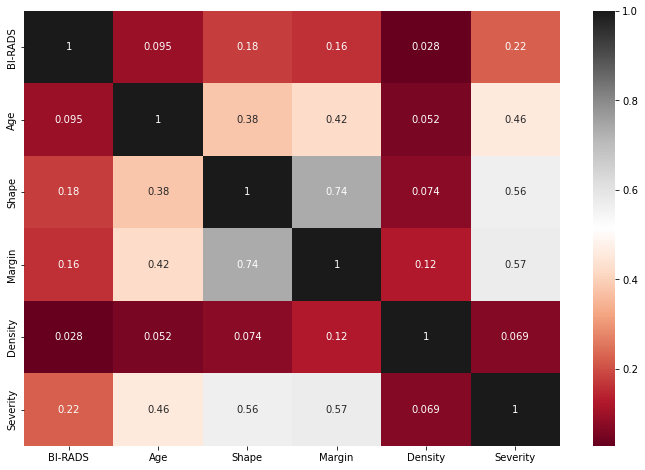

In [27]:
import seaborn as sns
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True,cmap = 'RdGy')

In [28]:
x = df.drop(columns= ['Severity'])

In [29]:
y = df['Severity']

In [30]:
x.head()

,BI-RADS,Age,Shape,Margin,Density
0,5,67,3,5,3
1,5,58,4,5,3
2,4,28,1,1,3
3,5,57,1,5,3
4,5,76,1,4,3


In [31]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Severity, dtype: int64

In [32]:
x.shape

(830, 5)

In [33]:
y.shape

(830,)

# Linear Regression

In [34]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.30, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train)

In [37]:
X_test=scaler.transform(X_test)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
import pickle
pickle.dump(lr,open('Mammographic_lr_model.pickle','wb'))

In [41]:
model=pickle.load((open('Mammographic_lr_model.pickle','rb')))

In [42]:
model

LinearRegression()

In [43]:
test=scaler.transform([[5,67,3,5,3]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
model.predict(test)

array([0.80078454])

In [45]:
lr.score(X_test,y_test)

0.4593429832862316

In [46]:
lr.score(X_train,y_train)

0.41668178656473065

In [47]:
lr.coef_

array([ 0.05276156,  0.12624659,  0.11534321,  0.13645212, -0.00901551])

In [48]:
lr.intercept_

0.4836488812392427

# Linear Regression with LASSO

In [49]:
lassocv = LassoCV(cv=10, max_iter=200000, normalize=True)
lassocv.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=10, max_iter=200000, normalize=True)

In [50]:
lassocv.alpha_

0.006230178416394695

In [51]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train,y_train)

Lasso(alpha=0.006230178416394695)

In [52]:
lasso.score(X_test,y_test)

0.45850162258948957

In [53]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
mse

array([-0.1477486 , -1.55160079, -0.14811077, -0.14767767, -0.13895628,
       -0.13381584, -0.14615149, -0.14831285, -0.16225544, -0.1468883 ])

In [54]:
np.mean(mse)

-0.2871518038798406

In [55]:
reg_predict=lr.predict(X_test)
reg_predict

array([ 1.74396763e-01,  1.37862393e-01,  7.90085439e-01, -3.43727094e-02,
        6.24439460e-02,  5.99810112e-01,  7.48994393e-01,  9.77976508e-02,
       -5.81206258e-02,  7.39414617e-01,  7.57606148e-01,  9.36485276e-01,
        6.78132622e-01,  5.54130702e-01,  8.93426500e-01,  8.82792114e-02,
        8.33144214e-01,  3.06477152e-01,  3.18709251e-01,  6.50361315e-01,
        5.85522353e-01,  8.40787949e-01,  5.66392449e-01, -2.17058754e-02,
        6.58973070e-01,  5.69266863e-01,  1.31337987e-01,  3.76630208e-01,
        3.78991537e-01,  8.78170720e-01,  6.24439460e-02,  7.27867111e-01,
        4.88705697e-01,  8.31208173e-01,  1.46474148e-01,  7.19255356e-01,
        7.78630958e-01,  6.70520576e-01,  6.10357909e-01,  1.48561497e-01,
        2.71475777e-01,  5.04547520e-01,  2.75650475e-01,  7.53702377e-01,
       -3.24049795e-02,  2.76557160e-01,  6.96355841e-01, -2.57609542e-02,
        6.36193174e-01,  4.86889275e-01,  6.38280523e-01,  5.93166087e-01,
        7.90085439e-01,  

# Create Linear Regression with Ridge

In [56]:
ridgecv=RidgeCV(alphas=np.random.uniform(0,10,50), cv=10, normalize=True)
ridgecv.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn

RidgeCV(alphas=array([0.08703672, 1.44952404, 5.69689335, 5.49266888, 4.18774973,
       1.83546581, 1.95871501, 9.27920692, 8.04815637, 7.99752918,
       9.4618546 , 0.23250997, 9.7830931 , 1.44514698, 4.07739465,
       8.3075272 , 8.73678491, 4.14333542, 3.05321549, 7.70138837,
       6.01960681, 3.51167367, 1.03077637, 7.40314681, 7.62742009,
       2.30150351, 3.39275847, 9.20819421, 8.79785166, 4.24061646,
       5.44355349, 0.47167986, 3.86241345, 1.92939248, 0.84173578,
       5.63162768, 0.10616733, 1.13660667, 8.35349145, 1.62739572,
       5.2677979 , 5.18565264, 9.17095883, 6.42419766, 5.11945169,
       3.06292647, 2.87031655, 7.27165664, 3.74115938, 6.60590737]),
        cv=10, normalize=True)

# LogisticRegression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing

Text(0.5, 1.0, ' Corelation Of Columns')

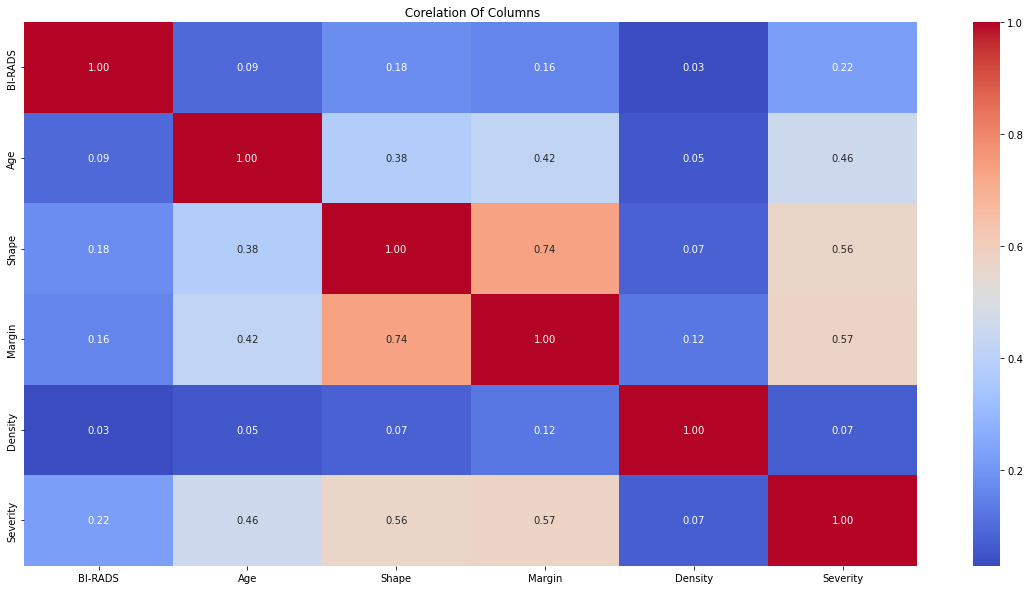

In [57]:
plt.figure(figsize=(20,10))
corr_columns = df.corr()
sns.heatmap(corr_columns,annot=True, fmt = ".2f", cmap = "coolwarm")
plt.title(' Corelation Of Columns')

<AxesSubplot:xlabel='Age', ylabel='Shape'>

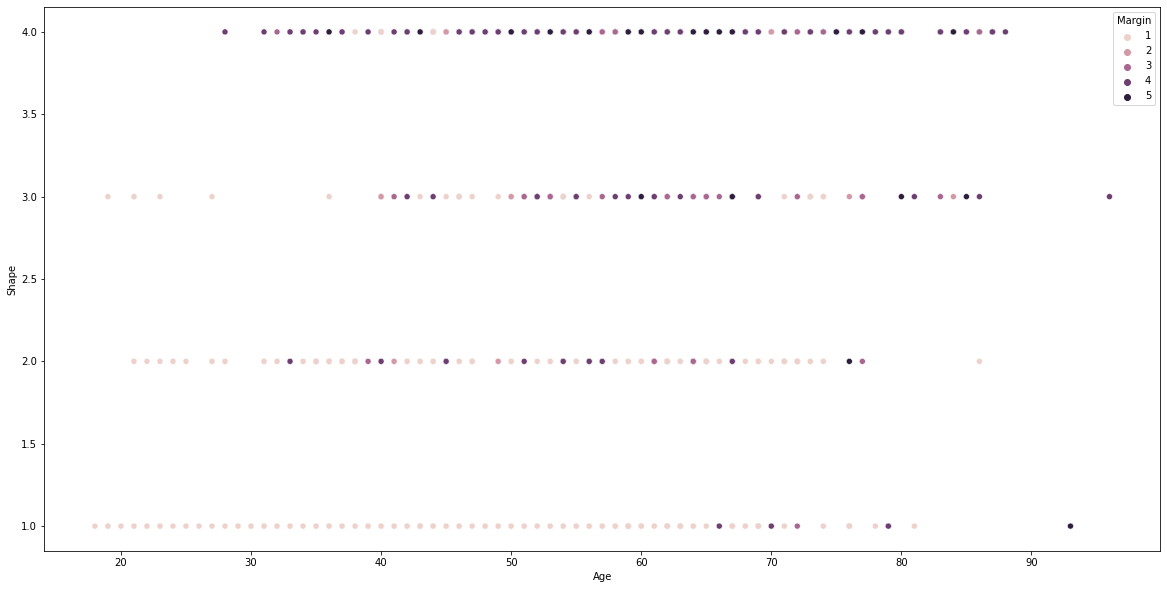

In [58]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df, x="Age", y="Shape",hue="Margin")

In [59]:
def detect_outliers(data,cols):
    for x in cols:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan

In [60]:
outliers_drop = detect_outliers(df, ["BI-RADS", 'Age', 'Shape', 'Margin', 
                                                      'Density', 'Severity'])

In [61]:
df = df.dropna(axis = 0)

In [62]:
df.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [63]:
X = df.drop(["Severity"], axis=1)
print(X)
y = df["Severity"]
print(y)


     BI-RADS   Age  Shape  Margin  Density
0        5.0  67.0    3.0     5.0      3.0
1        5.0  58.0    4.0     5.0      3.0
2        4.0  28.0    1.0     1.0      3.0
3        5.0  57.0    1.0     5.0      3.0
4        5.0  76.0    1.0     4.0      3.0
..       ...   ...    ...     ...      ...
825      4.0  47.0    2.0     1.0      3.0
826      4.0  56.0    4.0     5.0      3.0
827      4.0  64.0    4.0     5.0      3.0
828      5.0  66.0    4.0     5.0      3.0
829      4.0  62.0    3.0     3.0      3.0

[745 rows x 5 columns]
0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
825    0.0
826    1.0
827    0.0
828    1.0
829    0.0
Name: Severity, Length: 745, dtype: float64


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split

In [65]:
arr=scaler.fit_transform(X)

In [66]:
print(arr)

[[ 1.09417914  0.7449612   0.16578953  1.36980031  0.        ]
 [ 1.09417914  0.13335781  0.96782329  1.36980031  0.        ]
 [-0.68177611 -1.90532013 -1.43827799 -1.1830483   0.        ]
 ...
 [-0.68177611  0.5410934   0.96782329  1.36980031  0.        ]
 [ 1.09417914  0.67700527  0.96782329  1.36980031  0.        ]
 [-0.68177611  0.40518154  0.16578953  0.09337601  0.        ]]


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, test_size=0.25, random_state=101)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
scaled_X_train = scaler.fit_transform(X_train)

In [70]:
scaled_X_test = scaler.transform(X_test)

In [71]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

558
558
187
187


In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [75]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 10000)

In [76]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [77]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [78]:
grid_model.fit(scaled_X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\skl

GridSearchCV(estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [79]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

In [80]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [81]:
y_pred = grid_model.predict(scaled_X_test)
y_pred

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.])

In [82]:
accuracy_score(y_test, y_pred)

0.8663101604278075

In [83]:
confusion_matrix(y_test, y_pred)

array([[86,  8],
       [17, 76]], dtype=int64)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


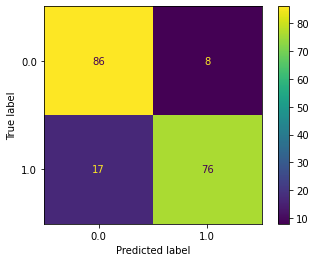

In [84]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87        94
         1.0       0.90      0.82      0.86        93

    accuracy                           0.87       187
   macro avg       0.87      0.87      0.87       187
weighted avg       0.87      0.87      0.87       187



In [86]:
ls

 Volume in drive C has no label.
 Volume Serial Number is F684-C316

 Directory of C:\Users\DELL

19-06-2023  13:17    <DIR>          .
16-01-2023  12:48    <DIR>          ..
15-06-2023  17:22    <DIR>          .ipynb_checkpoints
07-02-2023  17:27    <DIR>          .ipython
07-02-2023  17:46    <DIR>          .jupyter
21-02-2023  17:34    <DIR>          .matplotlib
28-01-2023  18:08    <DIR>          .ms-ad
15-06-2023  16:33    <DIR>          .vscode
03-04-2023  16:43             1,833 03-04-2023.ipynb
23-02-2023  17:42               696 Advertising_dataset.pickle
09-03-2023  17:48            22,294 Algerian forest fire dataset.ipynb
07-02-2023  17:13    <DIR>          anaconda3
16-05-2023  11:12           146,579 Black Friday Dataset_EDA.ipynb
23-02-2023  17:40               696 boston_dataset.pickle
22-03-2023  16:07            54,482 breast canser dataset logistic regression.ipynb
15-05-2023  11:23           335,738 Churn Modeling_EDA.ipynb
16-01-2023  12:47    <DIR>          Contac

# Decision Tree Classification

In [87]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy')

[Text(0.6194437622789783, 0.9782608695652174, 'X[0] <= 4.5\nentropy = 1.0\nsamples = 745\nvalue = [373, 372]'),
 Text(0.40539047151277013, 0.9347826086956522, 'X[2] <= 2.5\nentropy = 0.769\nsamples = 445\nvalue = [345, 100]'),
 Text(0.25920923379174854, 0.8913043478260869, 'X[1] <= 64.5\nentropy = 0.486\nsamples = 294\nvalue = [263, 31]'),
 Text(0.12156188605108055, 0.8478260869565217, 'X[1] <= 40.5\nentropy = 0.376\nsamples = 261\nvalue = [242, 19]'),
 Text(0.019646365422396856, 0.8043478260869565, 'X[1] <= 34.5\nentropy = 0.094\nsamples = 83\nvalue = [82, 1]'),
 Text(0.011787819253438114, 0.7608695652173914, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.0275049115913556, 0.7608695652173914, 'X[1] <= 35.5\nentropy = 0.196\nsamples = 33\nvalue = [32, 1]'),
 Text(0.019646365422396856, 0.717391304347826, 'X[2] <= 1.5\nentropy = 0.544\nsamples = 8\nvalue = [7, 1]'),
 Text(0.011787819253438114, 0.6739130434782609, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.0275049115

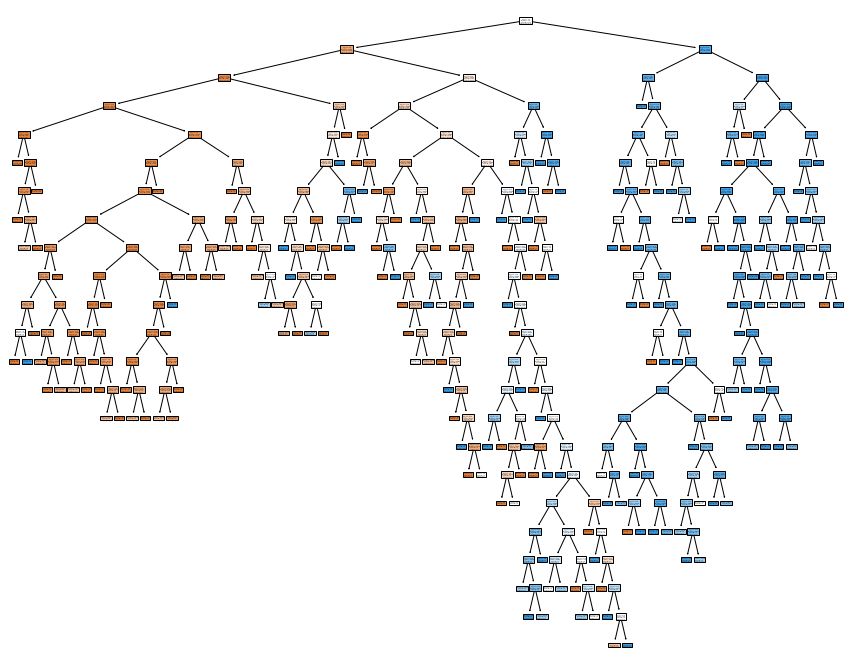

In [88]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(classifier,filled = True)

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(df.iloc[:,:-1],df.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5841178416746872, 0.9761904761904762, 'X[0] <= 4.5\ngini = 0.5\nsamples = 745\nvalue = [373, 372]'),
 Text(0.39802394128970164, 0.9285714285714286, 'X[2] <= 2.5\ngini = 0.348\nsamples = 445\nvalue = [345, 100]'),
 Text(0.27081328200192495, 0.8809523809523809, 'X[1] <= 64.5\ngini = 0.189\nsamples = 294\nvalue = [263, 31]'),
 Text(0.1758902791145332, 0.8333333333333334, 'X[3] <= 3.5\ngini = 0.135\nsamples = 261\nvalue = [242, 19]'),
 Text(0.09769008662175169, 0.7857142857142857, 'X[1] <= 40.5\ngini = 0.11\nsamples = 240\nvalue = [226, 14]'),
 Text(0.026948989412897015, 0.7380952380952381, 'X[1] <= 34.5\ngini = 0.024\nsamples = 82\nvalue = [81, 1]'),
 Text(0.019249278152069296, 0.6904761904761905, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'),
 Text(0.03464870067372473, 0.6904761904761905, 'X[1] <= 35.5\ngini = 0.061\nsamples = 32\nvalue = [31, 1]'),
 Text(0.026948989412897015, 0.6428571428571429, 'X[2] <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.019249278152069296

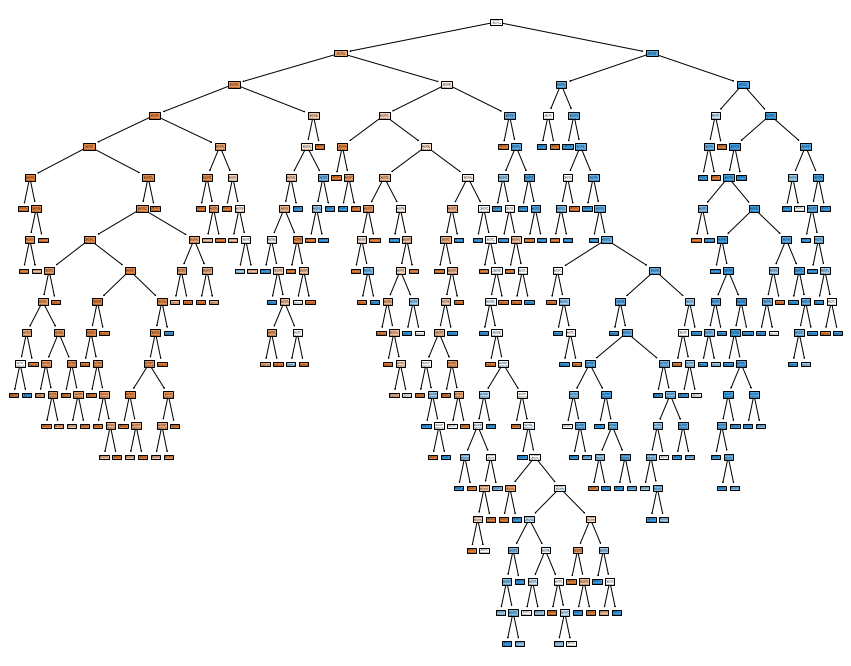

In [90]:
from sklearn import tree
plt.figure(figsize=(15,12))
tree.plot_tree(classifier,filled = True)

In [200]:
#ROC Curve
import matplotlib.pyplot as plt
from sklearn import metrics
def createROC(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

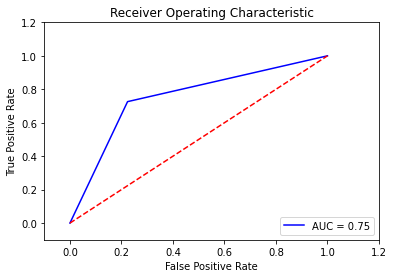

In [201]:
createROC(y_test, y_pred)

# Using Hyperparameter and GridSearchCV

In [146]:
df.head()
X = df.iloc[:,:-1]
print(X)
y = df.iloc[:,-1]
print(y)

     BI-RADS   Age  Shape  Margin  Density
0        5.0  67.0    3.0     5.0      3.0
1        5.0  58.0    4.0     5.0      3.0
2        4.0  28.0    1.0     1.0      3.0
3        5.0  57.0    1.0     5.0      3.0
4        5.0  76.0    1.0     4.0      3.0
..       ...   ...    ...     ...      ...
825      4.0  47.0    2.0     1.0      3.0
826      4.0  56.0    4.0     5.0      3.0
827      4.0  64.0    4.0     5.0      3.0
828      5.0  66.0    4.0     5.0      3.0
829      4.0  62.0    3.0     3.0      3.0

[745 rows x 5 columns]
0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
825    0.0
826    1.0
827    0.0
828    1.0
829    0.0
Name: Severity, Length: 745, dtype: float64


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [148]:
## prepruning

from sklearn.model_selection import GridSearchCV
params = {'max_depth' : [2,4,6,8,10,12],
         'min_samples_split' : [2,3,4],
         'min_samples_leaf':[1,2]}
clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator = clf, param_grid = params)
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [149]:
gcv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [150]:
y_pred = gcv.predict(X_test)
y_pred

array([0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1.])

In [151]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

In [152]:
accuracy_score(y_test, y_pred)

0.8125

In [153]:
confusion_matrix(y_test, y_pred)

array([[91, 21],
       [21, 91]], dtype=int64)

# Naive Bayes

In [99]:
scalar = StandardScaler()

In [100]:
X_scaled = scalar.fit_transform(x)

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [102]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [103]:
y_pred = naive_bayes.predict(X_test)

In [104]:
y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1.])

In [105]:
naive_bayes.score(X_test,y_test)

0.8482142857142857

In [106]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

In [107]:
accuracy_score(y_test, y_pred)

0.8482142857142857

In [108]:
confusion_matrix(y_test, y_pred)

array([[95, 17],
       [17, 95]], dtype=int64)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


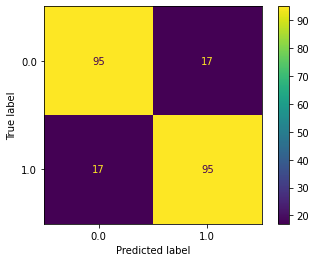

In [109]:
plot_confusion_matrix(naive_bayes, X_test, y_test)

In [110]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       112
         1.0       0.85      0.85      0.85       112

    accuracy                           0.85       224
   macro avg       0.85      0.85      0.85       224
weighted avg       0.85      0.85      0.85       224



In [205]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
clf = MultinomialNB()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
# clf.score(X_test,y_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.70666667 0.74666667 0.73333333 0.74666667 0.74666667 0.67567568
 0.74324324 0.75675676 0.77027027 0.71621622]
0.7342162162162162


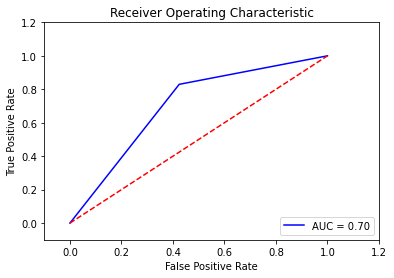

In [206]:
createROC(y_test, y_pred)

# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
forest = RandomForestClassifier(n_estimators = 10, max_features = 'auto', random_state =101) 

In [113]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [115]:
n_estimators = [64, 100, 125, 200]
max_features = [2,3,4]
bootstrap = [True, False]
oob_score = [True, False]

In [116]:
param_grid = {'n_estimators': n_estimators, 'max_features':max_features, 'bootstrap': bootstrap, 'oob_score': oob_score}

In [117]:
forest_model = RandomForestClassifier()

In [118]:
grid_model = GridSearchCV(forest_model, param_grid, verbose = 2)

In [119]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=True; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV] END bootstrap=True, max_features=2, n_estimators=64, oob_score=False; total time=   0.1s
[CV

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\User

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 125, 200],
                         'oob_score': [True, False]},
             verbose=2)

In [154]:
grid_model.best_params_

{'C': 0.5}

In [155]:
predictions = grid_model.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [156]:
rfc =  RandomForestClassifier(max_features =2, n_estimators = 200, oob_score = True)

In [157]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=2, n_estimators=200, oob_score=True)

In [158]:
rfc.oob_score_

0.7869481765834933

In [159]:
preds = forest.predict(X_test)

In [160]:
from sklearn.metrics import classification_report, plot_confusion_matrix

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


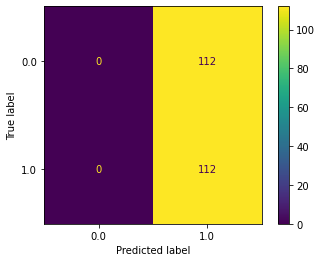

In [161]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [162]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       112
         1.0       0.50      1.00      0.67       112

    accuracy                           0.50       224
   macro avg       0.25      0.50      0.33       224
weighted avg       0.25      0.50      0.33       224



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [164]:
np.sum(preds != predictions)

119

In [165]:
from sklearn.metrics import accuracy_score
errors = []
misclassifications = []

for n in range(1, 200):
    rfc =  RandomForestClassifier(max_features =2, n_estimators = n)
    rfc.fit(X_train, y_train)
    preds = rfc.predict(X_test)
    error = 1- accuracy_score(y_test, preds)
    n_missed = np.sum(preds != y_test)

    errors.append(error)
    misclassifications.append(n_missed)

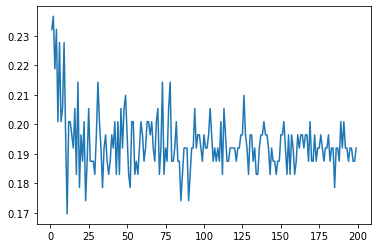

In [166]:
plt.plot(range(1,200), errors)

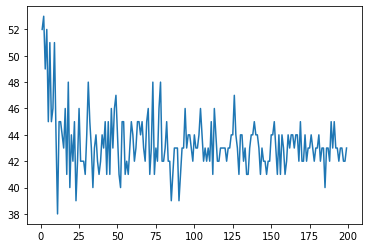

In [167]:
plt.plot(range(1,200), misclassifications)

# SVM

Next try using svm.SVC with a linear kernel.

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 101)

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
scaler = StandardScaler()

In [172]:
scaled_X_train = scaler.fit_transform(X_train)

In [173]:
scaled_X_test = scaler.transform(X_test)

In [174]:
from sklearn.svm import SVC

In [175]:
svc = SVC(class_weight = 'balanced')

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5,1]}

In [178]:
grid_model =GridSearchCV(svc, param_grid)

In [179]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]})

In [181]:
grid_model.best_params_

{'C': 0.5}

In [207]:
#1. LINEAR KERNEL
from sklearn import svm
svc = svm.SVC(kernel='linear', C=1)
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
scores = model_selection.cross_val_score(clf,X,y,cv=10)
print(scores)
print(scores.mean())

[0.70666667 0.74666667 0.73333333 0.74666667 0.74666667 0.67567568
 0.74324324 0.75675676 0.77027027 0.71621622]
0.7342162162162162


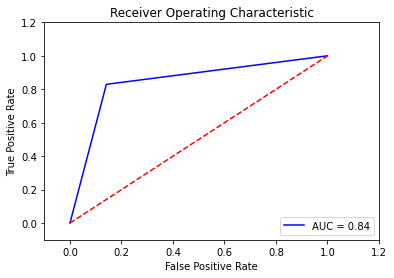

In [208]:
createROC(y_test, y_pred)

# KNN

How about K-Nearest-Neighbors?. Start with a K of 10. K is an example of a hyperparameter.

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
      # train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.30, random_state=42)

In [184]:
from sklearn.preprocessing import StandardScaler

In [185]:
     # Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

     # Scale the features using StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [187]:
y_pred = knn.predict(X_test)

In [189]:
y_pred

array([0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.])

In [190]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,f1_score

In [191]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7516778523489933


In [192]:
knn.score(X_test,y_test)

0.7516778523489933

In [193]:
knn.score(X_train,y_train)

0.8976510067114094

# Adaboost

In [226]:
df.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [227]:
X = df.drop('Shape',axis =1)
X

,BI-RADS,Age,Margin,Density,Severity
0,5.0,67.0,5.0,3.0,1.0
1,5.0,58.0,5.0,3.0,1.0
2,4.0,28.0,1.0,3.0,0.0
3,5.0,57.0,5.0,3.0,1.0
4,5.0,76.0,4.0,3.0,1.0
...,...,...,...,...,...
825,4.0,47.0,1.0,3.0,0.0
826,4.0,56.0,5.0,3.0,1.0
827,4.0,64.0,5.0,3.0,0.0
828,5.0,66.0,5.0,3.0,1.0


In [228]:
y = df['Shape']
y

0      3.0
1      4.0
2      1.0
3      1.0
4      1.0
      ... 
825    2.0
826    4.0
827    4.0
828    4.0
829    3.0
Name: Shape, Length: 745, dtype: float64

In [229]:
X = pd.get_dummies(X, drop_first = True)
X

,BI-RADS,Age,Margin,Density,Severity
0,5.0,67.0,5.0,3.0,1.0
1,5.0,58.0,5.0,3.0,1.0
2,4.0,28.0,1.0,3.0,0.0
3,5.0,57.0,5.0,3.0,1.0
4,5.0,76.0,4.0,3.0,1.0
...,...,...,...,...,...
825,4.0,47.0,1.0,3.0,0.0
826,4.0,56.0,5.0,3.0,1.0
827,4.0,64.0,5.0,3.0,0.0
828,5.0,66.0,5.0,3.0,1.0


In [230]:
from sklearn.ensemble import AdaBoostClassifier

In [231]:
model = AdaBoostClassifier(n_estimators = 1)

In [233]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [234]:
preds = model.predict(X_test)
preds

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.])

In [235]:
model.feature_importances_

array([1., 0., 0., 0., 0.])

In [236]:
model.feature_importances_.argmax()

0

In [238]:
X.columns[4]

'Severity'

<AxesSubplot:xlabel='Shape', ylabel='count'>

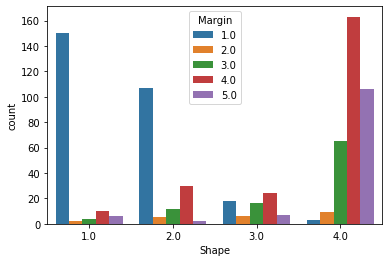

In [239]:
sns.countplot(data = df, x = 'Shape', hue = 'Margin')

In [240]:
len(X.columns)

5

In [241]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators = n)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    err = 1 - accuracy_score(y_test, preds)

    error_rates.append(err)

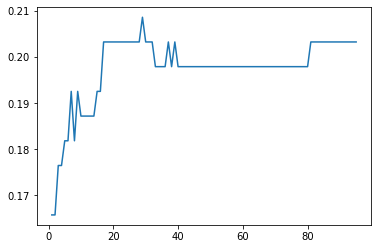

In [242]:
plt.plot(range(1,96), error_rates)

In [243]:
model

AdaBoostClassifier(n_estimators=95)

In [244]:
model.feature_importances_

array([0.05263158, 0.87368421, 0.05263158, 0.02105263, 0.        ])

In [245]:
feats = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns = ['Importance'])
feats

,Importance
BI-RADS,0.052632
Age,0.873684
Margin,0.052632
Density,0.021053
Severity,0.000000


In [246]:
imp_feats = feats[feats['Importance']>0]
imp_feats

,Importance
BI-RADS,0.052632
Age,0.873684
Margin,0.052632
Density,0.021053


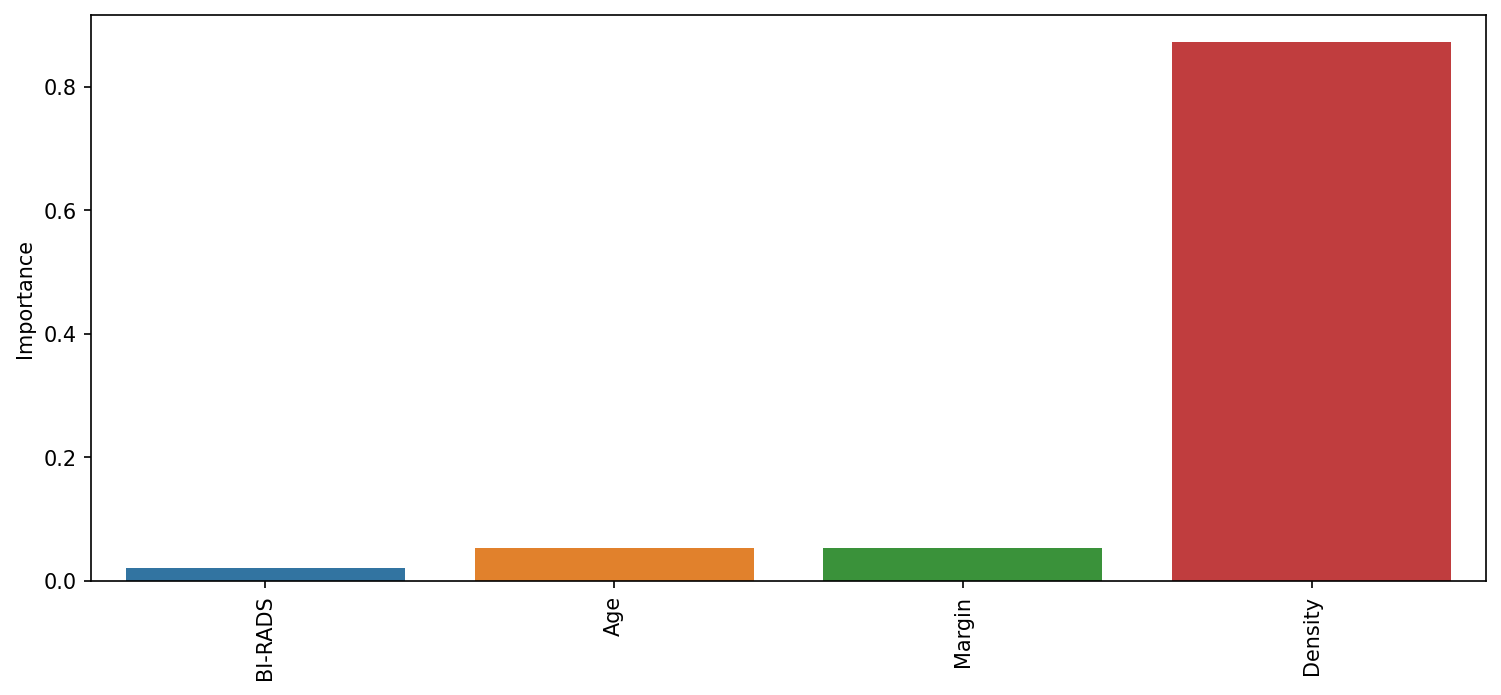

In [247]:
plt.figure(figsize = (12,5),dpi =150)
sns.barplot(data =imp_feats.sort_values("Importance"),x= imp_feats.index,y='Importance')
plt.xticks(rotation =90);